In [10]:
import pandas as pd

df = pd.read_csv("Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Step 1: Replace the null value in `Age` col with mean of this col | Drop these row\
Step 2: Using 4 columns : Survived, Age, Sex, Pclass.\
Step 3: Encode the categorical val into numerical

In [12]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


The value after dummies is still boolen type. => Use LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


Split the dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

Note: `stratify=y`

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

Using cross validation

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

np.float64(0.7857480547621394)

Using confuse matrix

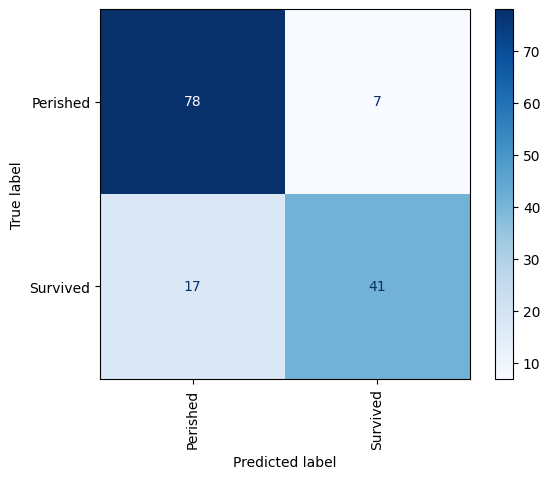

In [17]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Perished', 'Survived'],
                   cmap='Blues', xticks_rotation='vertical')

Using precision, recall, sensitivity, speciticity scores

In [18]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


**Nhận xét:**
* Precision tương đối cao, với 85%. Tức là có 85% kết quả phân loại là đúng với thực tế.
* Recall thấp hơn precision nói lên việc mô hình này tập trung phân loại kết quả sinh tồn của hành khách. Tức là trong 100 hành khách sống sót thì mô hình chỉ phân loại đúng 70 người.
* Độ đặc hiệu rất cao: chứng tỏ mô hình tập trung phân loại cho các ca không qua khỏi trong vụ tai nạn.

Using model to classify an example

In [19]:
female = pd.DataFrame({ 'Age': [30], 'Sex_female': [1], 'Sex_male': [0],
                        'Pclass_1': [1], 'Pclass_2': [0], 'Pclass_3': [0] })

model.predict(female)[0]

np.int64(1)

In [20]:
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 91.6%


If a 30 years old women got in the titanic with the first class, 91.6% she will survise.